In [63]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [64]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [65]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [66]:
df = pd.read_pickle('all_banks')
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [67]:
BAC=df['BAC']
C=df['C']
GS=df['GS']
JPM=df['JPM']
MS=df['MS']
WFC=df['WFC']

In [68]:
tickers=['BAC','C','GS','JPM','MS','WFC']
for tick in tickers:
    print(tick,":",df[tick]['Close'].max())

BAC : 54.9
C : 564.1
GS : 247.92
JPM : 70.08
MS : 89.3
WFC : 58.52


In [69]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [70]:
returns=pd.DataFrame()
for tick in tickers:
    returns[tick+' return']=df[tick]['Close'].pct_change()

In [71]:
returns

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


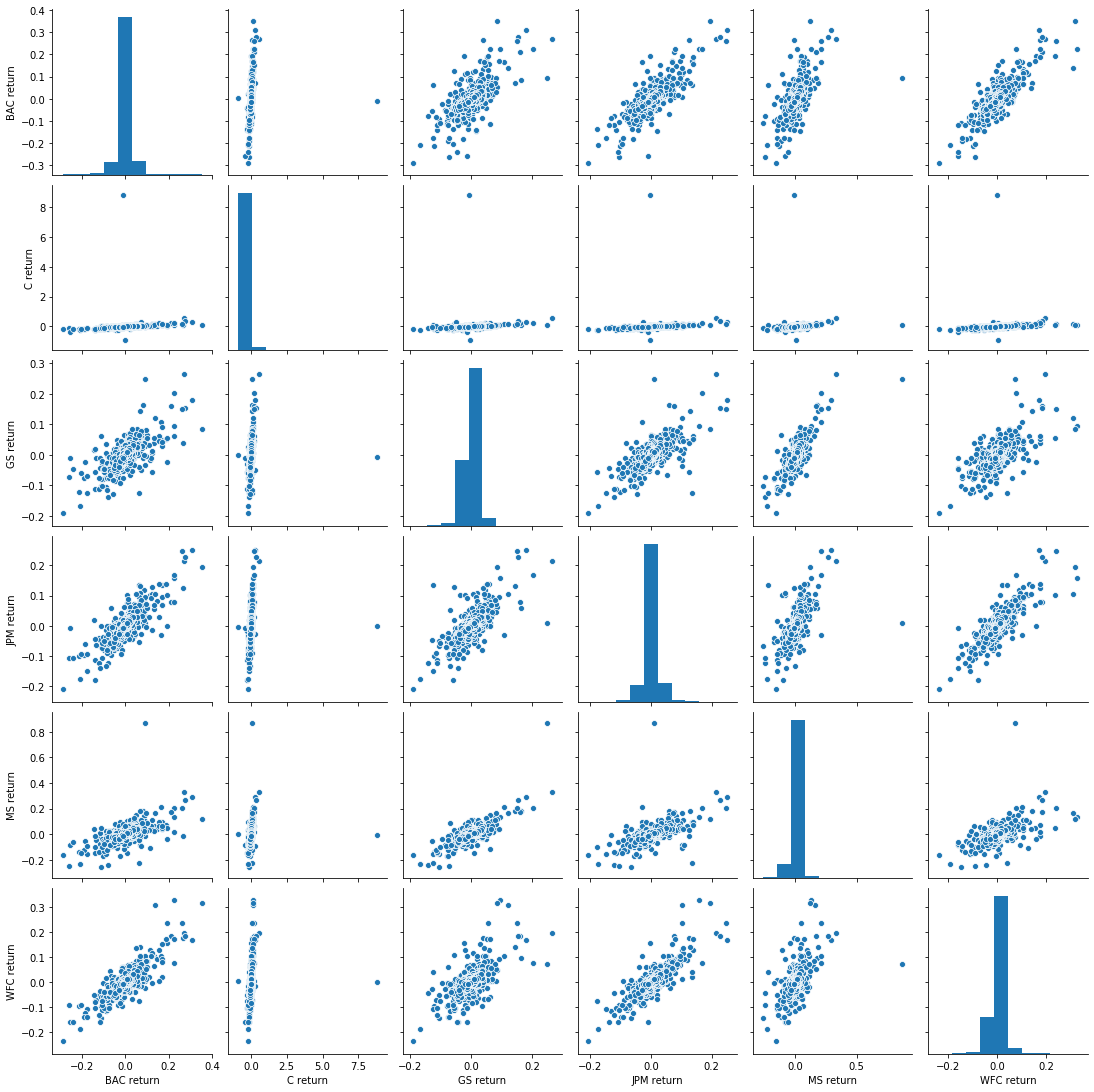

In [72]:
sns.pairplot(returns)
plt.show()

In [73]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [74]:
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [75]:
returns.std()

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

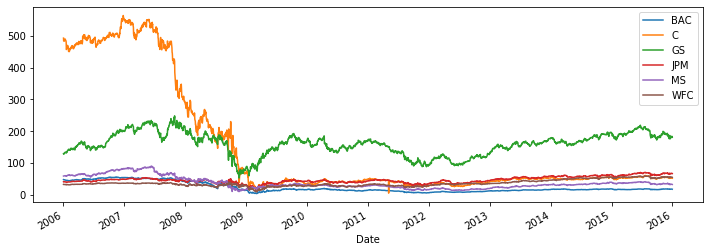

In [76]:
for tick in tickers:
    df[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

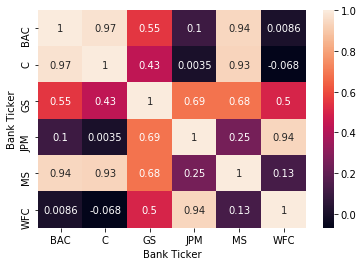

In [77]:
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [78]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [79]:
import chart_studio.plotly as py

In [80]:
from plotly import __version__
print(__version__)
import cufflinks as cf

4.14.3


In [81]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [82]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [83]:
init_notebook_mode(connected=True)

In [84]:
cf.go_offline()

In [85]:
df=pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df

,A,B,C,D
0,0.206612,0.215662,0.791092,-2.279091
1,-0.461045,-2.644875,1.073102,-0.222547
2,0.414041,-0.746394,0.893108,-0.231204
3,0.128213,0.151727,-0.446401,-0.755807
4,-0.013584,-0.706655,-2.224637,-1.954505
...,...,...,...,...
95,0.696049,-0.147728,-0.756312,0.140521
96,-1.690859,1.216267,-0.515328,1.464775
97,-0.764091,-0.123860,-0.784306,-0.261395
98,0.470533,-0.688372,-0.604371,0.193322


In [86]:
df2=pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})

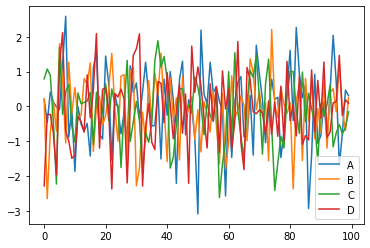

In [87]:
df.plot()

In [88]:
df.iplot()

In [91]:
df.iplot(kind='surface',x='A',y='B',mode='markers')

In [90]:
df.iplot(kind='spread',x='A',y='B',mode='markers')

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

